In [ ]:
git remote add origin https://github.com/Guille9815/hello-world.git
git branch -M main
git push -u origin main

  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)


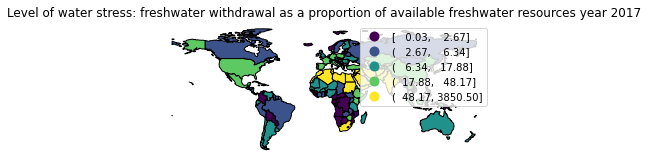

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Code,2017
83,86,2875422,Asia,Kuwait,KWT,301100.0,"POLYGON ((5340499.035 3500442.006, 5363728.010...",Kuwait,KWT,3850.500000
163,84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((5741805.754 2783351.667, 5761611.935...",United Arab Emirates,ARE,1708.000000
133,158,28571770,Asia,Saudi Arabia,SAU,1731000.0,"POLYGON ((3891288.264 3421106.202, 4015176.131...",Saudi Arabia,SAU,883.333333
90,164,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((2782987.270 2511525.235, 2782987.270...",Libya,LBY,817.142857
128,85,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((5656155.380 2845650.205, 5648786.307...",Qatar,QAT,432.413793
...,...,...,...,...,...,...,...,...,...,...
139,135,647581,Oceania,Solomon Is.,SLB,1198.0,"MULTIPOLYGON (((18047007.277 -1173496.191, 180...",Solomon Islands,SLB,NaN
141,167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((5448889.229 1278704.907, 5448889.229...",NaN,NaN,NaN
151,140,23508428,Asia,Taiwan,TWN,1127000.0,"POLYGON ((13556244.670 2801526.192, 13489209.6...",NaN,NaN,NaN
168,89,282814,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((18614489.182 -1792201.332, 186...",Vanuatu,VUT,NaN


In [3]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
from shapely.geometry import Point
import sys
!{sys.executable} -m pip install mapclassify
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world
world1 = (world.iloc[world['name'].str.normalize('NFKD').argsort()]).reset_index()
world1.drop(4, inplace = True)
water1 = pd.read_excel("python3.xls", engine = "xlrd", header = 3 )
world1[~world1['iso_a3'].isin(list(water1['Code']))][['iso_a3', 'name']]
world1.loc[world1.name == 'France', 'iso_a3'] = 'FRA'
world1.loc[world1.name == 'Norway', 'iso_a3'] = 'NOR'
water1 = world1.merge(water1,
                            left_on = 'iso_a3',
                            right_on = 'Code',
                            how = 'left',)
water1=water1.to_crs(epsg=3857)
ax = world1.plot(water1["2017"],  edgecolor = "black", scheme = "quantiles", legend = True)
ax.set_axis_off()
plt.title("Level of water stress: freshwater withdrawal as a proportion of available freshwater resources year 2017")
plt.rcParams["figure.figsize"]=20,20
plt.show()
water1.sort_values("2017", ascending
                   = False)



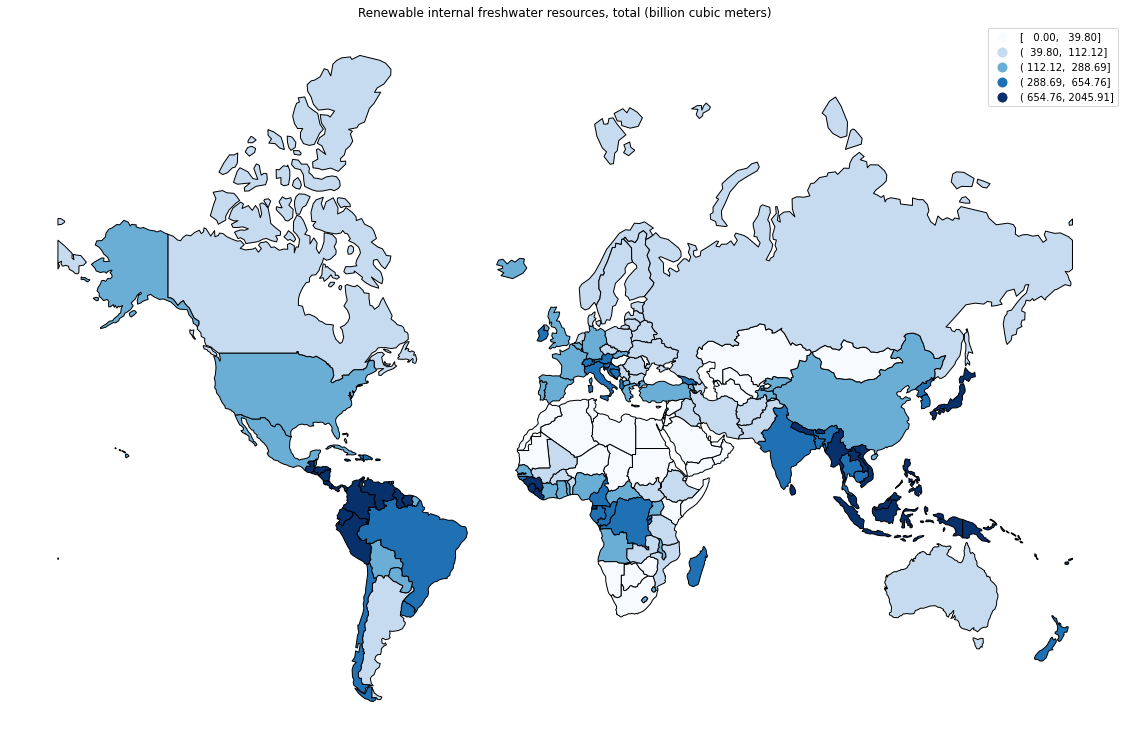

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,totalwater,area,water/area
136,64,6163195,Africa,Sierra Leone,SLE,10640.00,"POLYGON ((-1474599.230 995095.411, -1415088.64...",Sierra Leone,SLE,160.0,0.078205,2045.906330
33,34,4930258,North America,Costa Rica,CRI,79260.00,"POLYGON ((-9189000.534 1069879.491, -9232047.1...",Costa Rica,CRI,113.0,0.055852,2023.197659
89,63,4689021,Africa,Liberia,LBR,3881.00,"POLYGON ((-939458.408 858184.131, -944595.475 ...",Liberia,LBR,200.0,0.100141,1997.186188
31,32,47698524,South America,Colombia,COL,688000.00,"POLYGON ((-7444638.540 139534.582, -7465647.01...",Colombia,COL,2145.0,1.168893,1835.069396
120,33,3753142,North America,Panama,PAN,93120.00,"POLYGON ((-8610936.732 968901.296, -8624446.69...",Panama,PAN,136.6,0.077459,1763.505624
...,...,...,...,...,...,...,...,...,...,...,...,...
110,134,279070,Oceania,New Caledonia,NCL,10770.00,"POLYGON ((18454544.055 -2401420.887, 18545826....",New Caledonia,NCL,NaN,0.026869,NaN
119,79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((3940438.428 3696430.498, 3888101.327...",West Bank and Gaza,PSE,NaN,0.007015,NaN
141,167,3500000,Africa,Somaliland,-99,12250.00,"POLYGON ((5448889.229 1278704.907, 5448889.229...",NaN,NaN,NaN,0.173527,NaN
151,140,23508428,Asia,Taiwan,TWN,1127000.00,"POLYGON ((13556244.670 2801526.192, 13489209.6...",NaN,NaN,NaN,0.041193,NaN


In [18]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
import sys

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world1 = (world.iloc[world['name'].str.normalize('NFKD').argsort()]).reset_index()
world1.drop(4, inplace = True)
water2 = pd.read_excel("totalwater.xls", engine = "xlrd", header = 3 )
world1[~world1['iso_a3'].isin(list(water2['Country Code']))][['iso_a3', 'name']]
world1.loc[world1.name == 'France', 'iso_a3'] = 'FRA'
world1.loc[world1.name == 'Norway', 'iso_a3'] = 'NOR'
water2 = world1.merge(water2,
                            left_on = 'iso_a3',
                            right_on = 'Country Code',
                            how = 'left',)
water2=water2.to_crs(epsg=3857)
sqm_to_sqkm = 10**6
water2['area'] = (water2.geometry.area/sqm_to_sqkm)/1000000
water2 = water2.rename(columns={'2017': "totalwater"})
water2["water/area"]=water2.apply(lambda row: row.totalwater/row.area, axis =1)

ax = water2.plot(column= "water/area", cmap= "Blues",  edgecolor = "black", scheme = "quantiles", legend = True)
ax.set_axis_off()
plt.title("Renewable internal freshwater resources, total (billion cubic meters)")
plt.rcParams["figure.figsize"]=20,20
plt.show()
water2.sort_values("water/area", ascending
                   = False)

In [1]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install folium
import folium
from shapely.geometry import Point
import sys
!{sys.executable} -m pip install xlrd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world1 = (world.iloc[world['name'].str.normalize('NFKD').argsort()]).reset_index()
world1.drop(4, inplace = True)
water2 = pd.read_excel("totalwater.xls", engine = "xlrd", header = 3 )
world1[~world1['iso_a3'].isin(list(water2['Country Code']))][['iso_a3', 'name']]
world1.loc[world1.name == 'France', 'iso_a3'] = 'FRA'
world1.loc[world1.name == 'Norway', 'iso_a3'] = 'NOR'
water2 = world1.merge(water2,
                            left_on = 'iso_a3',
                            right_on = 'Country Code',
                            how = 'left',)
water2["gdppc"] = world.gdp_md_est / world.pop_est
water2=water2.to_crs(epsg=4236)
water2["center"] = water2.geometry.centroid


m = folium.Map(location=[14.5994, 28.6731], zoom_start=2, tiles='Openstreetmap')
BRICS=water2.loc[(water2["name"]=="Brazil")|(water2["name"]=="Russia")|(water2["name"]=="China")|(water2["name"]=="South Africa")|(water2["name"]=="India")]
for row in BRICS.iterrows():
    row_values = row[1] 
    center_point = row_values["center"]
    location = [center_point.y, center_point.x]
    popup = ("Country: " + str(row_values["name"]) + '<br>water used: ' + str(row_values["2017"]) + 
             ';  ' "GDPpc: " + str(row_values["gdppc"]))
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(m)
    
# Display the map
display(m)
BRICS

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


<ipython-input-1-f3acb483b2a9>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water2["center"] = water2.geometry.centroid


,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,2017,gdppc,center
19,29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.36461 -33.76792, -53.64155 -33.2...",Brazil,BRA,5661.0,0.027474,POINT (-53.04700 -10.80524)
30,139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.46780 18.19907, 108.64783 ...",China,CHN,2813.0,0.007034,POINT (103.87617 36.55535)
70,98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.31996 28.26190, 97.39543 27.88288...",India,IND,1446.0,0.004080,POINT (79.58866 22.92497)
130,18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.70973 71.10519, 179.98449 ...",Russian Federation,RUS,4312.0,0.050970,POINT (70.18891 63.81002)
142,25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34853 -28.57248, 16.82749 -28.077...",South Africa,ZAF,44.8,0.047236,POINT (25.05034 -28.94261)
